#Imports

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Data PreProcessing

In [6]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1']
for encoding in encodings:
    try:
        sms_data = pd.read_csv('spam.csv', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        print(sms_data.head())
        break
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)

Error reading file with encoding: utf-8
File read successfully with encoding: latin1
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [24]:
sms_data = sms_data.rename(columns = {'v1' : 'label','v2' : 'messages'})
print(sms_data.head())

  label                                           messages Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [25]:
print(sms_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   messages    5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 261.2+ KB
None


In [26]:
print(sms_data.describe())

       label                messages  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


#Data Visualization

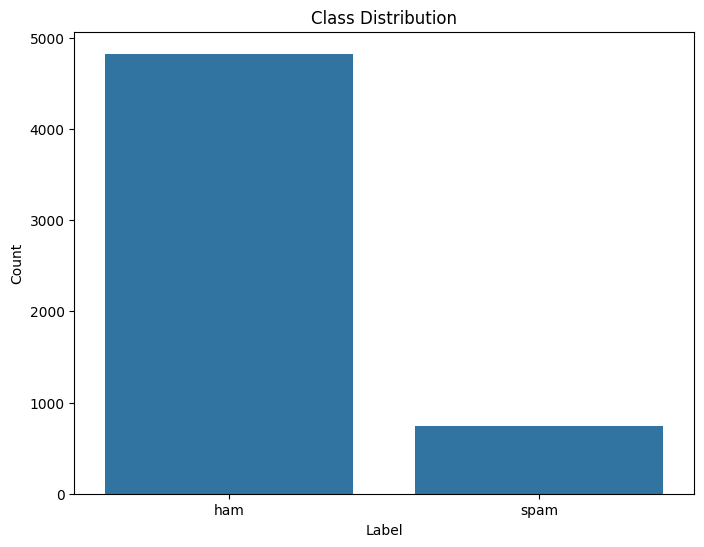

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=sms_data)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

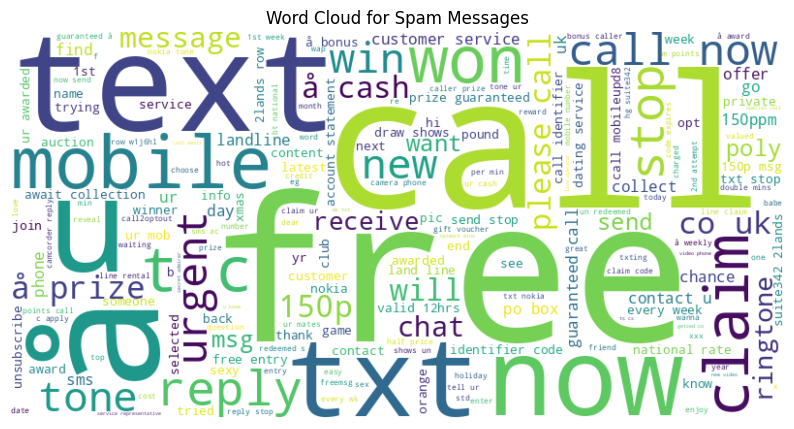

In [47]:
# Word Cloud for Spam messages
spam_messages = sms_data[sms_data['label'] == 'spam']['messages']
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

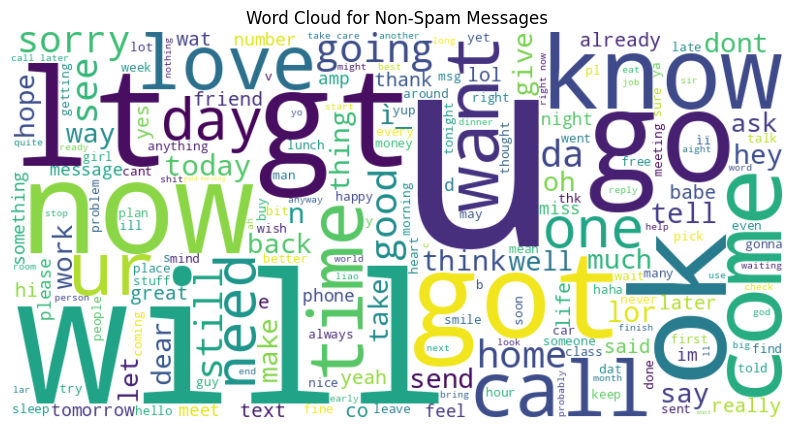

In [48]:
# Word Cloud for Non-Spam messages
non_spam_messages = sms_data[sms_data['label'] == 'ham']['messages']
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_spam_messages))
plt.figure(figsize=(10, 6))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Messages')
plt.axis('off')
plt.show()

In [28]:
sms_data['messages'] = sms_data['messages'].str.lower()

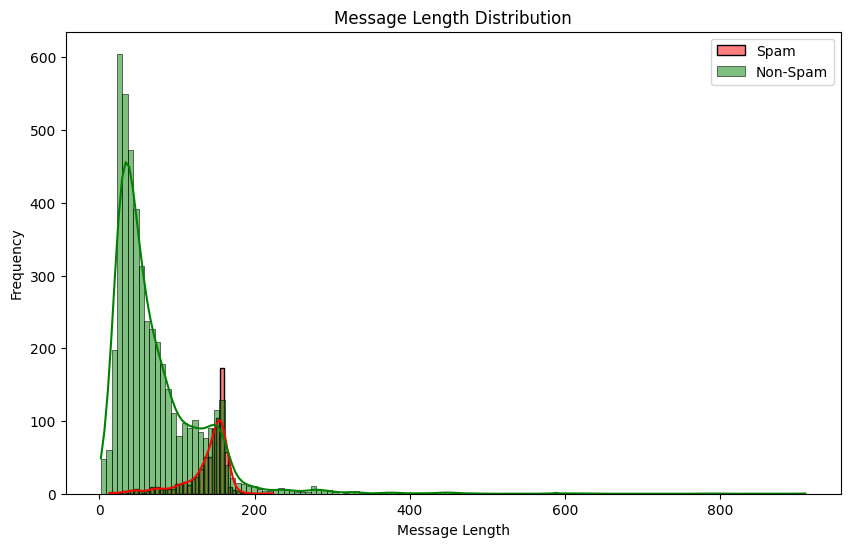

In [52]:
sms_data['message_length'] = sms_data['messages'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(sms_data[sms_data['label'] == 'spam']['message_length'], color='red', kde=True, label='Spam')
sns.histplot(sms_data[sms_data['label'] == 'ham']['message_length'], color='green', kde=True, label='Non-Spam')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Feature Extraction

In [57]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(sms_data['messages'])
y = sms_data['label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(sms_data['messages'], sms_data['label'], test_size=0.2, random_state=42)

In [65]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Model Training

In [75]:
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(probability = True),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier()
}

In [76]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "classification_report": report}

#Model Evaluation

In [77]:
best_classifier = max(results, key=lambda x: results[x]['accuracy'])

# Print the best classifier's results
print(f"Best Classifier: {best_classifier}")
print(f"Accuracy: {results[best_classifier]['accuracy']:.2f}")
print("Classification Report:")
print(results[best_classifier]['classification_report'])

Best Classifier: Support Vector Machine
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [78]:
best_clf = classifiers[best_classifier]
y_pred = best_clf.predict(X_test_tfidf)

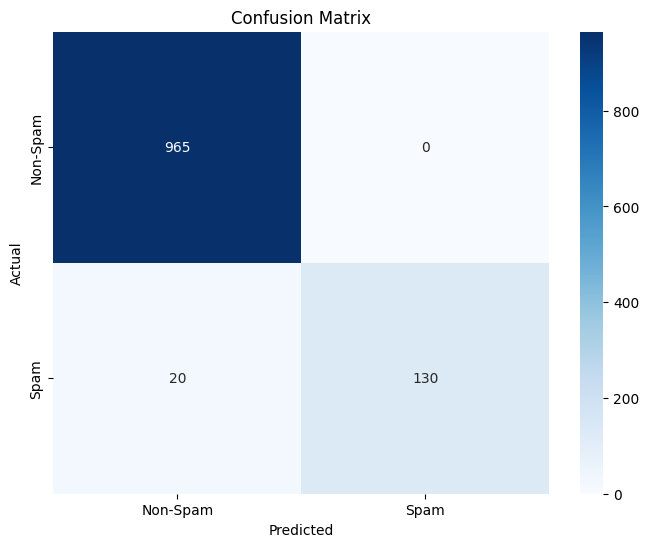

In [79]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

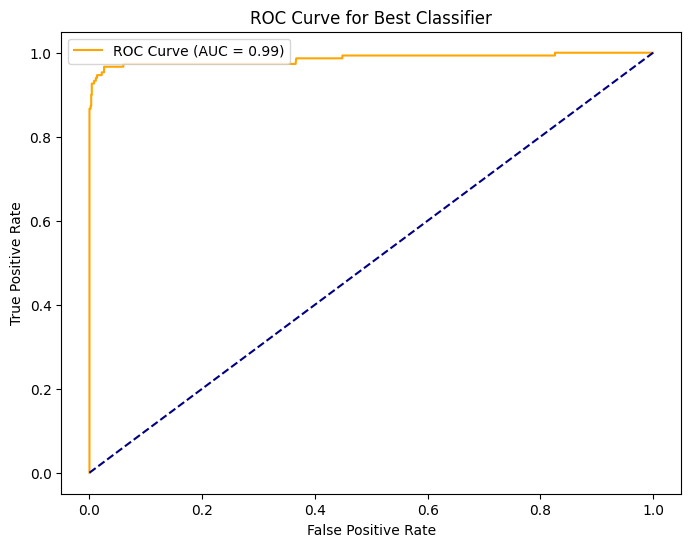

In [80]:
y_test_encoded = y_test.replace({'ham': 0, 'spam': 1})
# Calculate probabilities for ROC curve
y_probs_best = best_clf.predict_proba(X_test_tfidf)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test_encoded, y_probs_best)

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='orange', label=f'ROC Curve (AUC = {roc_auc_score(y_test_encoded, y_probs_best):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Classifier')
plt.legend()
plt.show()

#Prediction

In [83]:
text = input("Enter the text to classify: ")
text_tfidf = tfidf_vectorizer.transform([text])
prediction = best_clf.predict(text_tfidf)
if prediction[0] == 'ham':
    print("The entered text is not spam.")
else:
    print("The entered text is spam.")

Enter the text to classify: Congratulations! You have won a free vacation! Click here to claim your prize now!
The entered text is spam.
